In [241]:
import os
import torch
import torchvision
from torch import nn
from model import SRCNN
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader

In [242]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SRCNN(in_channels=3).to(device)
model.load_state_dict(torch.load('./model_checkpoint/model_mae_0.0021.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [243]:
def toTensor(images_path:list , resize:int = 224) -> list:
    full_tensor = []
    input_transformer = transforms.Compose([transforms.Resize((resize, resize))])
    for image in images_path :
        image = torchvision.io.read_image(image).type(torch.float32) / 255.
        input_ = input_transformer(image)
        full_tensor.append(input_)
    return full_tensor

In [257]:
custom_imagespath = [os.path.join('./custom_images/', name) for name in os.listdir('./custom_images/')]
imagesTensor = toTensor(custom_imagespath, 128)

In [254]:
def upScale(imagesTensor:list)->list :
    upScaleImages = []
    for image in imagesTensor :
        upScale = model(image)
        upScaleImages.append(upScale)

    return upScaleImages

In [258]:
upScaleImages = upScale(imagesTensor)
originalImage = toTensor(custom_imagespath, 512)

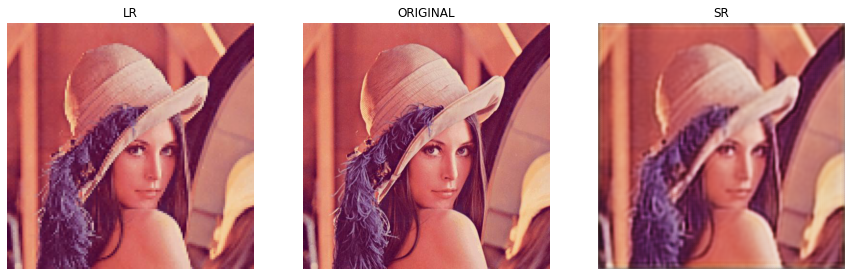

In [259]:
samepleImage = 8
plt.figure(figsize=(15,10))
for i, (image,title) in enumerate([(imagesTensor, 'LR'), (originalImage, 'ORIGINAL'), (upScaleImages, 'SR')]) :
    if i == 2 :
        image = torch.sigmoid(image[samepleImage])
    else :
        image = image[samepleImage]
    plt.subplot(1,3,i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image.detach().permute(1,2,0))